In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Loading the datasets
test_data = pd.read_csv('test_data.csv')
training_data = pd.read_csv('training_data.csv')
training_targets = pd.read_csv('training_data_targets.csv', header=None, names=['Target'])


In [3]:
print("Number of data points and labels in the Training Data:", training_data.shape)
print("Number of data points and labels in the Training Targets:", training_targets.shape)
print("Number of data points and labels in the Test Data:", test_data.shape)

Number of data points and labels in the Training Data: (156, 450)
Number of data points and labels in the Training Targets: (156, 1)
Number of data points and labels in the Test Data: (18, 450)


In [4]:
# Displaying the first few rows of the datasets
print("Test Data:\n", test_data.head())
print("\nTraining Data:\n", training_data.head())
print("\nTraining Targets:\n", training_targets.head())


Test Data:
    air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  \
0       5880     0.000007    167.703955      332.126873              1402   
1       5705     0.000011    331.233476      156.489551              1039   
2       4830     0.000012    205.765881       98.679157              1643   
3      22520     0.000010     28.734515      103.894460               981   
4       5160     0.000013    120.804174       86.853334               957   

   max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  \
0              5626          0.339520            0.250085  249.915414   
1              7637          1.373276            0.140836  243.861514   
2              8121          0.267541            0.150560  152.222519   
3              5830          0.067748            0.122897   66.314487   
4              6601          0.361800            0.217459  103.828754   

   mean_jerk_in_air1  ...  mean_gmrt25  mean_jerk_in_air25  \
0           0.054317  ..

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


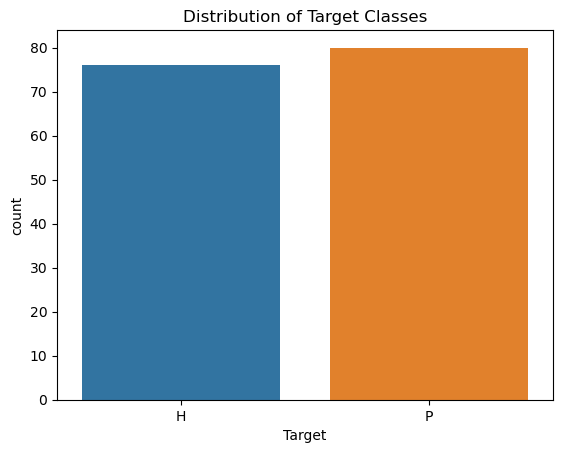

In [5]:
# Distribution of Target Classes
sns.countplot(x='Target', data=training_targets)
plt.title('Distribution of Target Classes')
plt.show()


In [6]:
# Function to check and impute missing values
def check_and_impute_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing values in the dataset:\n", missing_values)
    if missing_values.sum() > 0:
        print("Imputing missing values with mean...")
        imputer = SimpleImputer(strategy='mean')
        return pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    else:
        print("No missing values found.")
        return data

training_data = check_and_impute_missing_values(training_data)
test_data = check_and_impute_missing_values(test_data)


Missing values in the dataset:
 air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
max_x_extension1    0
                   ..
num_of_pendown25    0
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
Length: 450, dtype: int64
No missing values found.
Missing values in the dataset:
 air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
max_x_extension1    0
                   ..
num_of_pendown25    0
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
Length: 450, dtype: int64
No missing values found.


In [10]:
# Encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(training_targets['Target'])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(training_data)
X_test_scaled = scaler.transform(test_data)

# Feature Selection using RFE
estimator = RandomForestClassifier(random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1) 
X_selected = selector.fit_transform(X_scaled, y_encoded)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_selected, y_encoded, test_size=0.2, random_state=42)


## Before applying Hyper Paramater Tuning

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=10)
dt_model.fit(X_train, y_train)

# Evaluation on Validation Set
print("Decision Tree Classifier Validation Scores:", dt_cv_scores)


Decision Tree Classifier Validation Scores: [0.92307692 1.         0.84615385 0.84615385 0.91666667 0.75
 0.58333333 0.91666667 1.         0.66666667]


In [15]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10)
rf_model.fit(X_train, y_train)

# Evaluation on Validation Set
print("Random Forest Classifier Validation Scores:", rf_cv_scores)


Random Forest Classifier Validation Scores: [0.92307692 0.92307692 0.84615385 0.84615385 1.         0.83333333
 0.83333333 0.91666667 1.         0.83333333]


In [16]:
from sklearn.svm import SVC

# Linear SVM (Hard Margin)
svm_hard = SVC(kernel='linear', C=1000)
svm_hard_cv_scores = cross_val_score(svm_hard, X_train, y_train, cv=10)
svm_hard.fit(X_train, y_train)

# Evaluation on Validation Set
print("Linear SVM (Hard Margin) Validation Scores:", svm_hard_cv_scores)

# Linear SVM (Soft Margin)
svm_soft = SVC(kernel='linear', C=0.1)
svm_soft_cv_scores = cross_val_score(svm_soft, X_train, y_train, cv=10)
svm_soft.fit(X_train, y_train)

# Evaluation on Validation Set
print("Linear SVM (Soft Margin) Validation Scores:", svm_soft_cv_scores)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf_cv_scores = cross_val_score(svm_rbf, X_train, y_train, cv=10)
svm_rbf.fit(X_train, y_train)

# Evaluation on Validation Set
print("RBF Kernel SVM Validation Scores:", svm_rbf_cv_scores)


Linear SVM (Hard Margin) Validation Scores: [1.         0.76923077 0.92307692 0.92307692 1.         0.75
 0.75       0.83333333 0.91666667 0.83333333]
Linear SVM (Soft Margin) Validation Scores: [1.         0.76923077 0.84615385 0.92307692 1.         0.75
 0.83333333 0.75       0.91666667 0.91666667]
RBF Kernel SVM Validation Scores: [1.         0.76923077 0.84615385 0.92307692 1.         0.75
 0.83333333 0.75       0.91666667 0.91666667]


In [17]:
from sklearn.naive_bayes import GaussianNB

# Gaussian NB
gnb_model = GaussianNB()
gnb_cv_scores = cross_val_score(gnb_model, X_train, y_train, cv=10)
gnb_model.fit(X_train, y_train)

# Evaluation on Validation Set
print("Gaussian Naive Bayes Validation Scores:", gnb_cv_scores)


Gaussian Naive Bayes Validation Scores: [1.         0.61538462 0.84615385 0.92307692 1.         0.66666667
 0.83333333 0.91666667 0.83333333 0.91666667]


In [18]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_cv_scores = cross_val_score(ada_model, X_train, y_train, cv=10)
ada_model.fit(X_train, y_train)

# Evaluation on Validation Set
print("AdaBoost Classifier Validation Scores:", ada_cv_scores)


AdaBoost Classifier Validation Scores: [0.92307692 0.92307692 0.84615385 0.92307692 0.91666667 0.83333333
 0.83333333 0.91666667 1.         0.75      ]


In [19]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_cv_scores = cross_val_score(log_reg, X_train, y_train, cv=10)
log_reg.fit(X_train, y_train)

# Evaluation on Validation Set
print("Logistic Regression Validation Scores:", log_reg_cv_scores)


Logistic Regression Validation Scores: [1.         0.69230769 0.84615385 0.92307692 1.         0.83333333
 0.83333333 0.75       0.91666667 0.91666667]


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

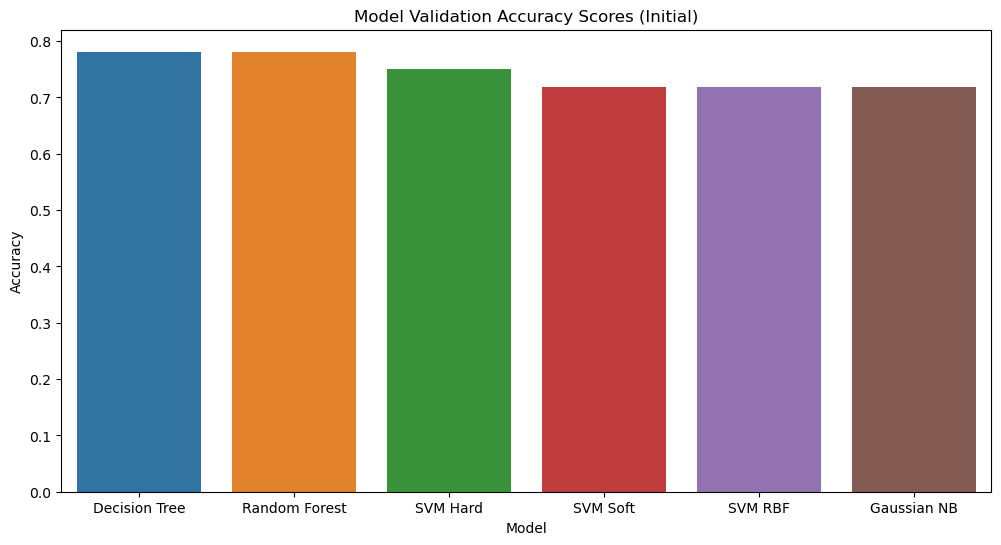

Classification Reports for Initial Model Performances:
Decision Tree:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


SVM Hard:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.69      0.69      0.69        13

    accuracy                           0.75        32
   macro avg       0.74     

In [15]:

model_names = ['Decision Tree', 'Random Forest', 'SVM Hard', 'SVM Soft', 'SVM RBF', 'Gaussian NB']
validation_scores = [dt_val_acc, rf_val_acc, svm_hard_val_acc, svm_soft_val_acc, svm_rbf_val_acc, gnb_val_acc]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=model_names, y=validation_scores)
plt.title('Model Validation Accuracy Scores (Initial)')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

# classification reports
print("Classification Reports for Initial Model Performances:")
print("Decision Tree:\n", dt_val_report)
print("\nRandom Forest:\n", rf_val_report)
print("\nSVM Hard:\n", svm_hard_val_report)
print("\nSVM Soft:\n", svm_soft_val_report)
print("\nSVM RBF:\n", svm_rbf_val_report)
print("\nGaussian NB:\n", gnb_val_report)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

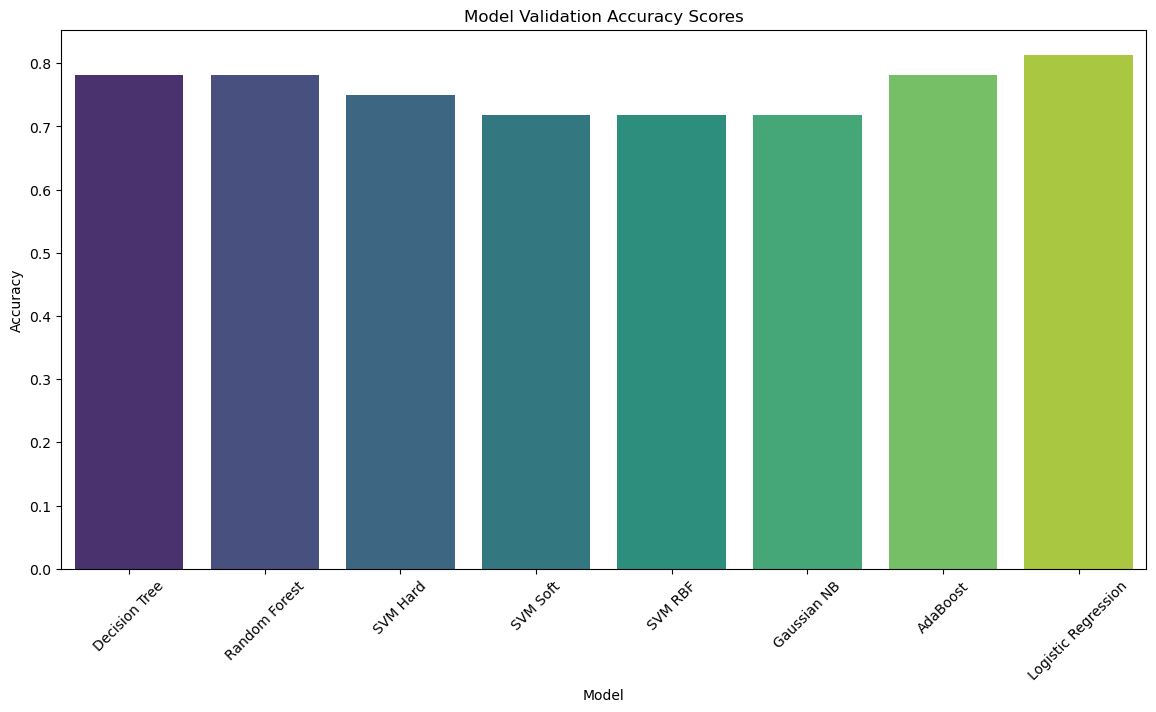

Classification Reports for Model Performances:
Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


SVM Hard:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        19
           1       0.69      0.69      0.69        13

    accuracy                           0.75        32
   macro avg       0.74      0.74      

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    return accuracy_score(y_val, y_val_pred), classification_report(y_val, y_val_pred)

# Evaluating all models
dt_val_acc, dt_val_report = evaluate_model(dt_model, X_val, y_val)
rf_val_acc, rf_val_report = evaluate_model(rf_model, X_val, y_val)
svm_hard_val_acc, svm_hard_val_report = evaluate_model(svm_hard, X_val, y_val)
svm_soft_val_acc, svm_soft_val_report = evaluate_model(svm_soft, X_val, y_val)
svm_rbf_val_acc, svm_rbf_val_report = evaluate_model(svm_rbf, X_val, y_val)
gnb_val_acc, gnb_val_report = evaluate_model(gnb_model, X_val, y_val)
ada_val_acc, ada_val_report = evaluate_model(ada_model, X_val, y_val)
log_reg_val_acc, log_reg_val_report = evaluate_model(log_reg, X_val, y_val)

# Storing model names and their validation scores
model_names = ['Decision Tree', 'Random Forest', 'SVM Hard', 'SVM Soft', 'SVM RBF', 'Gaussian NB', 'AdaBoost', 'Logistic Regression']
validation_scores = [dt_val_acc, rf_val_acc, svm_hard_val_acc, svm_soft_val_acc, svm_rbf_val_acc, gnb_val_acc, ada_val_acc, log_reg_val_acc]

# Plotting Model Validation Accuracy Scores
plt.figure(figsize=(14, 7))
sns.barplot(x=model_names, y=validation_scores, palette='viridis')
plt.title('Model Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# Display classification reports
print("Classification Reports for Model Performances:")
for model_name, report in zip(model_names, [dt_val_report, rf_val_report, svm_hard_val_report, svm_soft_val_report, svm_rbf_val_report, gnb_val_report, ada_val_report, log_reg_val_report]):
    print(f"{model_name}:\n{report}\n")


# After applying Hyper Paramenter Tuning (Gridsearch)

In [21]:
from sklearn.model_selection import GridSearchCV

# Parameters for Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch on Decision Tree
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=10, n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Decision Tree Parameters:", dt_grid_search.best_params_)


Best Decision Tree Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [22]:
# Parameters for Random Forest
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch on Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=10, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Random Forest Parameters:", rf_grid_search.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [23]:
# Parameters for SVM
svm_params = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# GridSearch on SVM
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=10, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best SVM Parameters:", svm_grid_search.best_params_)


Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


#### Gaussian Naive Bayes with GridSearchCV
Gaussian Naive Bayes typically doesn't require hyperparameter tuning.

In [24]:
# Parameters for AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

# GridSearch on AdaBoost
ada_grid_search = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=10, n_jobs=-1)
ada_grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best AdaBoost Parameters:", ada_grid_search.best_params_)


Best AdaBoost Parameters: {'learning_rate': 1, 'n_estimators': 200}


In [25]:
# Parameters for Logistic Regression
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# GridSearch on Logistic Regression
log_reg_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=10, n_jobs=-1)
log_reg_grid_search.fit(X_train, y_train)

# Best estimator and parameters
print("Best Logistic Regression Parameters:", log_reg_grid_search.best_params_)


Best Logistic Regression Parameters: {'C': 10, 'solver': 'newton-cg'}


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_d

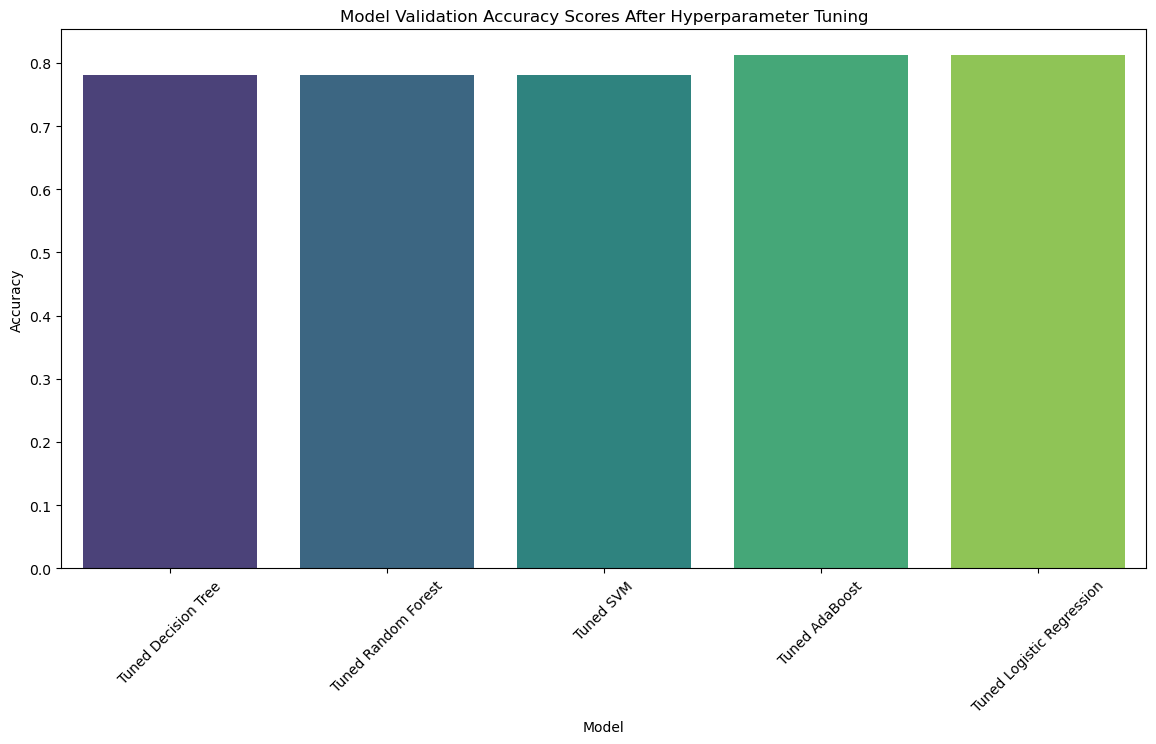

Classification Reports for Tuned Model Performances:
Tuned Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.88      0.74      0.80        19
           1       0.69      0.85      0.76        13

    accuracy                           0.78        32
   macro avg       0.78      0.79      0.78        32
weighted avg       0.80      0.78      0.78        32


Tuned SVM:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.75      0.69      0.72        13

    accuracy                           0.78        32
   macro avg       0

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score

grid_search_objects = [dt_grid_search, rf_grid_search, svm_grid_search, ada_grid_search, log_reg_grid_search]
model_names = ['Tuned Decision Tree', 'Tuned Random Forest', 'Tuned SVM', 'Tuned AdaBoost', 'Tuned Logistic Regression']

validation_scores = []
classification_reports = []


def evaluate_tuned_model(grid_search_model, X_val, y_val):
    best_model = grid_search_model.best_estimator_
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    report = classification_report(y_val, y_val_pred)
    return accuracy, report

for grid_search, model_name in zip(grid_search_objects, model_names):
    val_acc, val_report = evaluate_tuned_model(grid_search, X_val, y_val)
    validation_scores.append(val_acc)
    classification_reports.append(val_report)

# Visualization of Model Validation Accuracy Scores
plt.figure(figsize=(14, 7))
sns.barplot(x=model_names, y=validation_scores, palette='viridis')
plt.title('Model Validation Accuracy Scores After Hyperparameter Tuning')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

#classification reports
print("Classification Reports for Tuned Model Performances:")
for model_name, report in zip(model_names, classification_reports):
    print(f"{model_name}:\n{report}\n")


In [35]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Models you've used
models = [dt_model, rf_model, svm_hard, svm_soft, svm_rbf, gnb_model, ada_model, log_reg]
model_names = ['Decision Tree', 'Random Forest', 'SVM Hard', 'SVM Soft', 'SVM RBF', 'Gaussian NB', 'AdaBoost', 'Logistic Regression']

# Initialize a DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Precision', 'Recall', 'F1-Score'], index=model_names)

# Calculate and store the metrics
for model, name in zip(models, model_names):
    y_pred = model.predict(X_val)  # Assuming X_val is your validation set features
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')  # Assuming y_val is your validation set labels
    metrics_df.loc[name] = [precision, recall, f1]

metrics_df


,Precision,Recall,F1-Score
Decision Tree,0.78125,0.791498,0.77931
Random Forest,0.78125,0.791498,0.77931
SVM Hard,0.740891,0.740891,0.740891
SVM Soft,0.713636,0.690283,0.694592
SVM RBF,0.708333,0.702429,0.704615
Gaussian NB,0.708333,0.702429,0.704615
AdaBoost,0.78125,0.791498,0.77931
Logistic Regression,0.805668,0.805668,0.805668


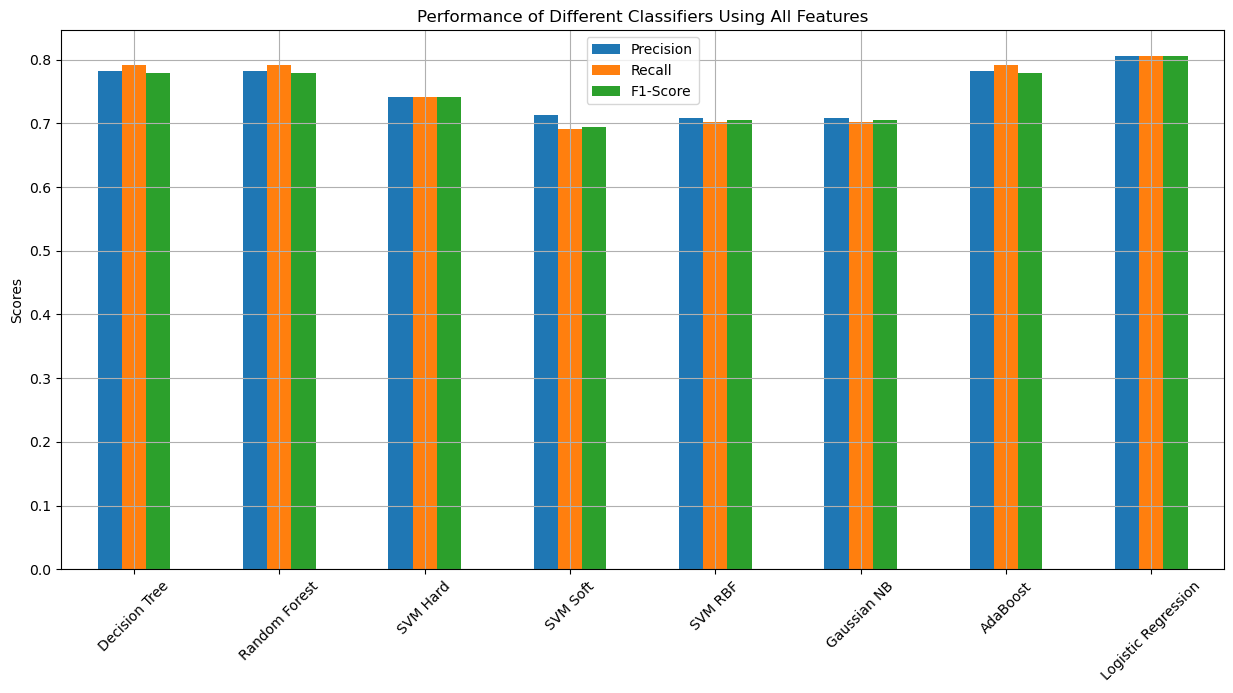

In [36]:
import matplotlib.pyplot as plt

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(15, 7))
plt.title('Performance of Different Classifiers Using All Features')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


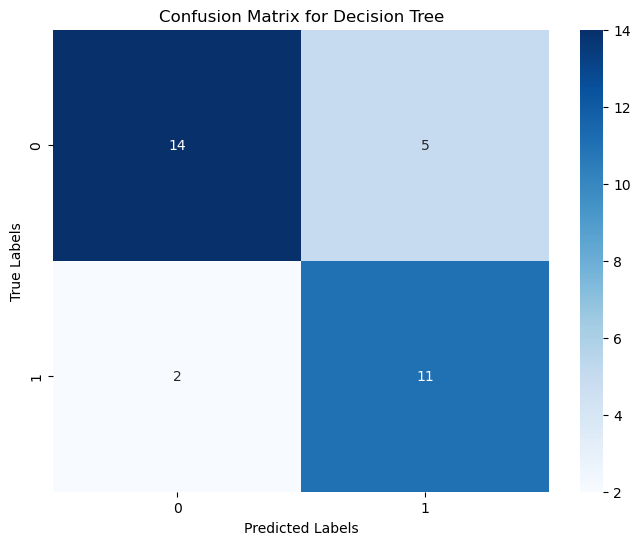

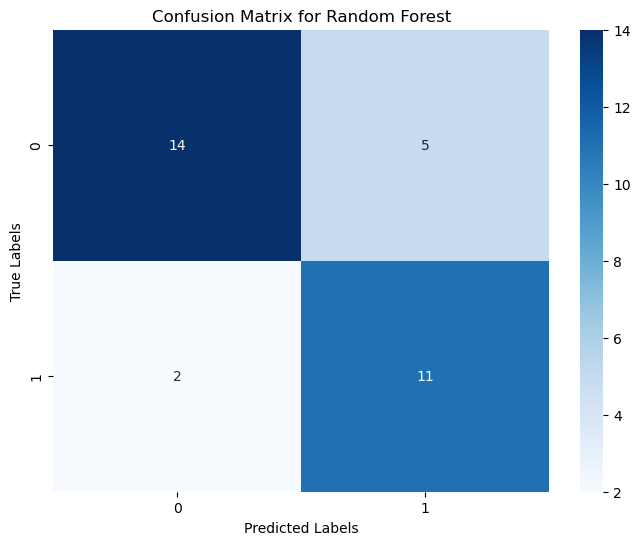

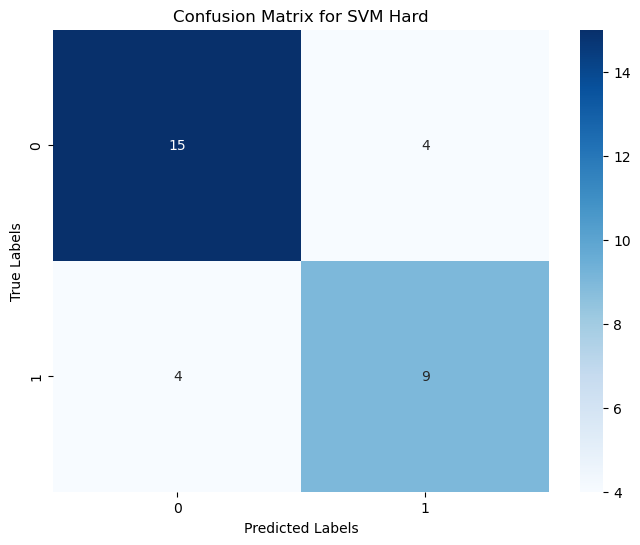

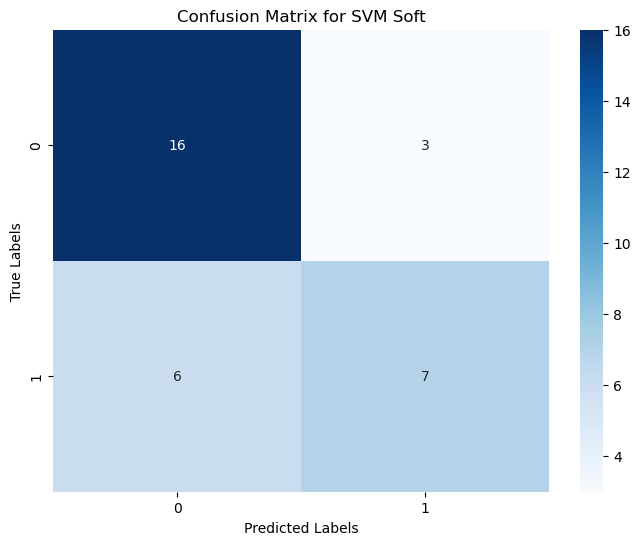

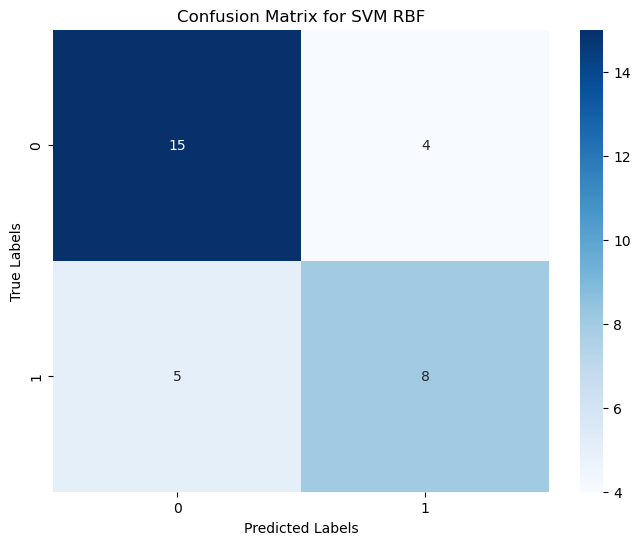

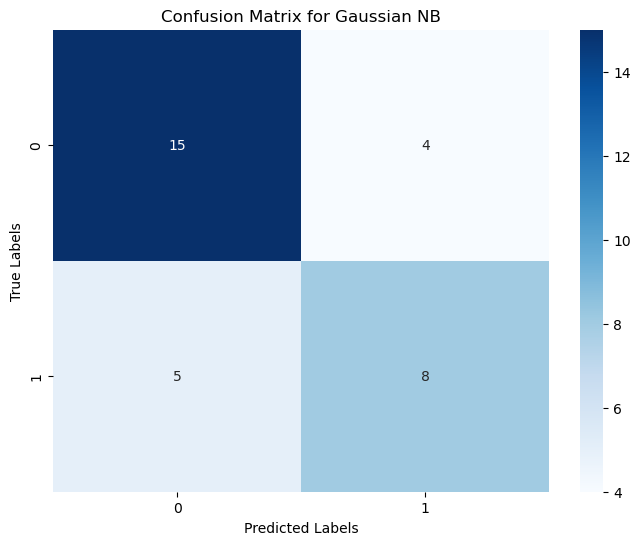

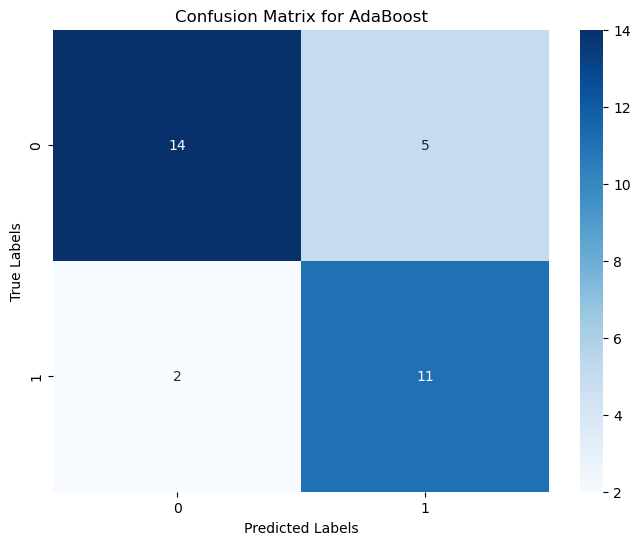

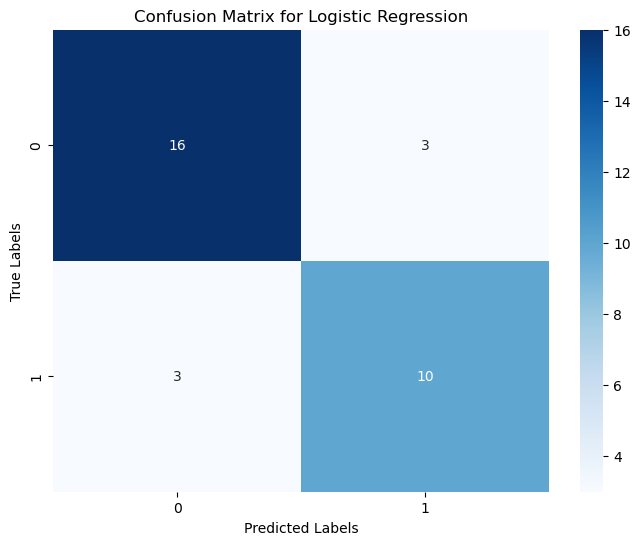

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting confusion matrices for each model
for model, name in zip(models, model_names):
    y_pred = model.predict(X_val)  # Assuming X_val is your validation set features
    cm = confusion_matrix(y_val, y_pred)  # Assuming y_val is your validation set labels

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


In [31]:

from sklearn.metrics import accuracy_score

def evaluate_model(model, X_val, y_val):
    y_val_pred = model.predict(X_val)
    return accuracy_score(y_val, y_val_pred)

# Evaluate initial models
dt_val_acc = evaluate_model(dt_model, X_val, y_val)
rf_val_acc = evaluate_model(rf_model, X_val, y_val)
svm_hard_val_acc = evaluate_model(svm_hard, X_val, y_val)
svm_soft_val_acc = evaluate_model(svm_soft, X_val, y_val)
svm_rbf_val_acc = evaluate_model(svm_rbf, X_val, y_val)
gnb_val_acc = evaluate_model(gnb_model, X_val, y_val)
ada_val_acc = evaluate_model(ada_model, X_val, y_val)
log_reg_val_acc = evaluate_model(log_reg, X_val, y_val)

# Evaluate tuned models
grid_dt_val_acc = evaluate_model(dt_grid_search.best_estimator_, X_val, y_val)
grid_rf_val_acc = evaluate_model(rf_grid_search.best_estimator_, X_val, y_val)
grid_svm_val_acc = evaluate_model(svm_grid_search.best_estimator_, X_val, y_val)
grid_ada_val_acc = evaluate_model(ada_grid_search.best_estimator_, X_val, y_val)
grid_log_reg_val_acc = evaluate_model(log_reg_grid_search.best_estimator_, X_val, y_val)

# Compare accuracies
model_accuracies = {
    'Decision Tree': dt_val_acc,
    'Random Forest': rf_val_acc,
    'SVM Hard': svm_hard_val_acc,
    'SVM Soft': svm_soft_val_acc,
    'SVM RBF': svm_rbf_val_acc,
    'Gaussian NB': gnb_val_acc,
    'AdaBoost': ada_val_acc,
    'Logistic Regression': log_reg_val_acc,
    'Tuned Decision Tree': grid_dt_val_acc,
    'Tuned Random Forest': grid_rf_val_acc,
    'Tuned SVM': grid_svm_val_acc,
    'Tuned AdaBoost': grid_ada_val_acc,
    'Tuned Logistic Regression': grid_log_reg_val_acc
}


best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"The best model based on validation accuracy is {best_model_name} with an accuracy of {best_model_accuracy:.2f}")


The best model based on validation accuracy is Logistic Regression with an accuracy of 0.81


In [32]:

if best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'SVM Hard':
    best_model = svm_hard
elif best_model_name == 'SVM Soft':
    best_model = svm_soft
elif best_model_name == 'SVM RBF':
    best_model = svm_rbf
elif best_model_name == 'Gaussian NB':
    best_model = gnb_model
elif best_model_name == 'AdaBoost':
    best_model = ada_model
elif best_model_name == 'Logistic Regression':
    best_model = log_reg
elif best_model_name == 'Tuned Decision Tree':
    best_model = dt_grid_search.best_estimator_
elif best_model_name == 'Tuned Random Forest':
    best_model = rf_grid_search.best_estimator_
elif best_model_name == 'Tuned SVM':
    best_model = svm_grid_search.best_estimator_
elif best_model_name == 'Tuned AdaBoost':
    best_model = ada_grid_search.best_estimator_
elif best_model_name == 'Tuned Logistic Regression':
    best_model = log_reg_grid_search.best_estimator_

X_test_selected = selector.transform(X_test_scaled)

test_predictions = best_model.predict(X_test_selected)

transformed_predictions = ['H' if label == 0 else 'P' for label in test_predictions]

print("Transformed Predicted Class Labels for the Test Data:")
print(transformed_predictions)


Transformed Predicted Class Labels for the Test Data:
['H', 'H', 'P', 'H', 'P', 'P', 'P', 'P', 'P', 'H', 'P', 'H', 'H', 'P', 'P', 'P', 'H', 'P']


In [34]:
filename = 'predicted_class_labels_21234.txt'

# Writing to the file
with open(filename, 'w') as file:
    for prediction in transformed_predictions:
        file.write(prediction + '\n')

print(f"Predicted class labels saved to {filename}")


Predicted class labels saved to predicted_class_labels_21234.txt
